# Hager Mohamed
# Dina Mohamed

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import spacy
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# load data

In [3]:
train_df = pd.read_csv('/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv',header=None)
val_df = pd.read_csv('/kaggle/input/twitter-entity-sentiment-analysis/twitter_validation.csv',header=None)
col=['id','type','label','review']
train_df.columns=col
val_df.columns=col

train_df

,id,type,label,review
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      74682 non-null  int64 
 1   type    74682 non-null  object
 2   label   74682 non-null  object
 3   review  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [5]:
val_df.head(10)

,id,type,label,review
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
5,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
6,7925,MaddenNFL,Positive,Thank you @EAMaddenNFL!! \n\nNew TE Austin Hoo...
7,11332,TomClancysRainbowSix,Positive,"Rocket League, Sea of Thieves or Rainbow Six: ..."
8,1107,AssassinsCreed,Positive,my ass still knee-deep in Assassins Creed Odys...
9,2069,CallOfDuty,Negative,FIX IT JESUS ! Please FIX IT ! What In the wor...


In [6]:
train_df.groupby('label').describe()

id                                                   \
              count         mean          std   min      25%     50%   
label                                                                  
Irrelevant  12990.0  5928.771363  3616.510316   5.0  2942.00  5153.0   
Negative    22542.0  6760.267767  3479.188211   1.0  3825.00  7105.0   
Neutral     18318.0  6494.270881  3959.853892   3.0  3173.00  6904.0   
Positive    20832.0  6337.924827  3850.925866  12.0  2754.75  6000.5   

                               
                 75%      max  
label                          
Irrelevant   9369.00  13200.0  
Negative     9384.00  13194.0  
Neutral     10011.00  13197.0  
Positive     9707.75  13198.0

In [7]:
val_df.groupby('label').describe()

id                                                            \
            count         mean          std    min      25%     50%     75%   
label                                                                         
Irrelevant  172.0  6228.203488  3759.027198  171.0  3311.00  6055.5  9497.0   
Negative    266.0  6910.289474  3277.383258  115.0  4894.25  7065.0  9453.5   
Neutral     285.0  6313.922807  3947.902610    6.0  2952.00  6496.0  9966.0   
Positive    277.0  6221.054152  3860.329921   12.0  2703.00  6224.0  9766.0   

                     
                max  
label                
Irrelevant  13176.0  
Negative    13097.0  
Neutral     13197.0  
Positive    13195.0

# Data Preprocessing

In [8]:
train_df['label'].replace({'Negative':0,'Irrelevant':1,'Neutral':2,'Positive':3},inplace=True)
val_df['label'].replace({'Negative':0,'Irrelevant':1,'Neutral':2,'Positive':3},inplace=True)
train_df

,id,type,label,review
0,2401,Borderlands,3,im getting on borderlands and i will murder yo...
1,2401,Borderlands,3,I am coming to the borders and I will kill you...
2,2401,Borderlands,3,im getting on borderlands and i will kill you ...
3,2401,Borderlands,3,im coming on borderlands and i will murder you...
4,2401,Borderlands,3,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,3,Just realized that the Windows partition of my...
74678,9200,Nvidia,3,Just realized that my Mac window partition is ...
74679,9200,Nvidia,3,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,3,Just realized between the windows partition of...


In [9]:
train_df['Length'] = train_df['review'].str.len()
train_df

,id,type,label,review,Length
0,2401,Borderlands,3,im getting on borderlands and i will murder yo...,53.0
1,2401,Borderlands,3,I am coming to the borders and I will kill you...,51.0
2,2401,Borderlands,3,im getting on borderlands and i will kill you ...,50.0
3,2401,Borderlands,3,im coming on borderlands and i will murder you...,51.0
4,2401,Borderlands,3,im getting on borderlands 2 and i will murder ...,57.0
...,...,...,...,...,...
74677,9200,Nvidia,3,Just realized that the Windows partition of my...,128.0
74678,9200,Nvidia,3,Just realized that my Mac window partition is ...,117.0
74679,9200,Nvidia,3,Just realized the windows partition of my Mac ...,125.0
74680,9200,Nvidia,3,Just realized between the windows partition of...,159.0


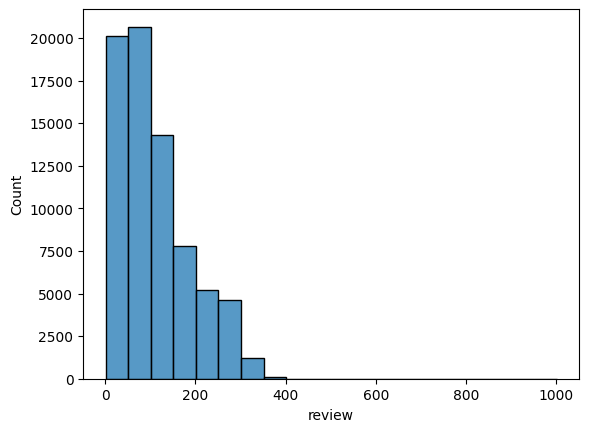

In [10]:
sns.histplot(train_df["review"].str.len(), binwidth=50)
plt.show()

# Clean Data

In [11]:
import nltk
nltk.download('punkt') # one time execution
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
%%time
import re
#Removes Punctuations
def remove_punctuations(data):
    punct_tag=re.compile(r'[^\w\s]')
    data=punct_tag.sub(r'',data)
    return data

#Removes HTML syntaxes
def remove_html(data):
    html_tag=re.compile(r'<.*?>')
    data=html_tag.sub(r'',data)
    return data

#Removes URL data
def remove_url(data):
    url_clean= re.compile(r"https://\S+|www\.\S+")
    data=url_clean.sub(r'',data)
    return data

#Removes Emojis
def remove_emoji(data):
    emoji_clean= re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    data=emoji_clean.sub(r'',data)
    url_clean= re.compile(r"https://\S+|www\.\S+")
    data=url_clean.sub(r'',data)
    return data

#remove stopwords
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stop_words.add('subject')
stop_words.add('http')
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])
train_df['review'] = train_df['review'].apply(lambda z: remove_stopwords(z))    

train_df['review']=train_df['review'].apply(lambda z: remove_punctuations(z))

train_df['review']=train_df['review'].apply(lambda z: remove_html(z))
train_df['review']=train_df['review'].apply(lambda z: remove_url(z))
train_df['review']=train_df['review'].apply(lambda z: remove_emoji(z))


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
CPU times: user 1.05 s, sys: 20.8 ms, total: 1.07 s
Wall time: 1.07 s


In [13]:
train_df

,id,type,label,review,Length
0,2401,Borderlands,3,im getting borderlands murder,53.0
1,2401,Borderlands,3,I coming borders I kill all,51.0
2,2401,Borderlands,3,im getting borderlands kill all,50.0
3,2401,Borderlands,3,im coming borderlands murder all,51.0
4,2401,Borderlands,3,im getting borderlands 2 murder all,57.0
...,...,...,...,...,...
74677,9200,Nvidia,3,Just realized Windows partition Mac like 6 yea...,128.0
74678,9200,Nvidia,3,Just realized Mac window partition 6 years beh...,117.0
74679,9200,Nvidia,3,Just realized windows partition Mac 6 years be...,125.0
74680,9200,Nvidia,3,Just realized windows partition Mac like 6 yea...,159.0


In [14]:
train_df['review'][:5]

0         im getting borderlands murder 
1            I coming borders I kill all
2        im getting borderlands kill all
3       im coming borderlands murder all
4    im getting borderlands 2 murder all
Name: review, dtype: object

# Tokenizer

In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [16]:
from collections import Counter
unique_words = Counter()
train_df['review'].str.lower().str.split().apply(unique_words.update)
vocab_size = len(unique_words)
print('unique_words : ',vocab_size)
# print(unique_words)

unique_words :  40818


In [17]:
max_sequence_len = 0
for sequence in train_df['review']:
#     print(sequence)
#     print(len(sequence.split())) 
    max_sequence_len = max(len(sequence.split()), max_sequence_len)
print("max_sequence :" , max_sequence_len)

max_sequence : 198


In [18]:
train_df['sequence_len'] = train_df['review'].apply(lambda x : len(x.split()))
train_df

,id,type,label,review,Length,sequence_len
0,2401,Borderlands,3,im getting borderlands murder,53.0,4
1,2401,Borderlands,3,I coming borders I kill all,51.0,6
2,2401,Borderlands,3,im getting borderlands kill all,50.0,5
3,2401,Borderlands,3,im coming borderlands murder all,51.0,5
4,2401,Borderlands,3,im getting borderlands 2 murder all,57.0,6
...,...,...,...,...,...,...
74677,9200,Nvidia,3,Just realized Windows partition Mac like 6 yea...,128.0,15
74678,9200,Nvidia,3,Just realized Mac window partition 6 years beh...,117.0,14
74679,9200,Nvidia,3,Just realized windows partition Mac 6 years be...,125.0,14
74680,9200,Nvidia,3,Just realized windows partition Mac like 6 yea...,159.0,18


In [19]:
train_df['sequence_len'].max()

198

In [20]:
X_train = train_df['review']
y_train = train_df['label']
y_train = tf.keras.utils.to_categorical( y_train)

In [21]:
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X_train)

training_sequences = tokenizer.texts_to_sequences(X_train)
training_padded = pad_sequences(training_sequences, maxlen=max_sequence_len, padding='post')

# print(f'Reviews: \n{X_train[0]}\n')
print(f'Training Sequences: \n{training_sequences[0]} \n')
print(f'Training padded: \n{training_padded[0]} \n')

for i in training_sequences[0]:
    print(tokenizer.index_word[i])

Training Sequences: 
[4, 97, 68, 1661] 

Training padded: 
[   4   97   68 1661    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0   

### 

### validation

In [22]:
X_val = val_df['review']
y_val = val_df['label']
y_val = tf.keras.utils.to_categorical(y_val)

In [23]:
#validation
validation_sequences = tokenizer.texts_to_sequences(X_val)
validation_padded = pad_sequences(validation_sequences, maxlen=max_sequence_len, padding='post')

print(f'Testing Sequences: \n{validation_sequences[0]}\n')
print(f'Testing padded: \n{validation_padded[0]}\n')

for i in validation_sequences[0]:
    print(tokenizer.index_word[i])

Testing Sequences: 
[1, 2214, 152, 37, 109, 1, 523, 2471, 172, 5348, 124, 35, 172, 28, 369, 3, 1957, 67, 1227, 952, 814, 5424, 583, 29, 8775, 348, 9, 209, 186, 43, 601, 124, 1173, 4696, 434, 63, 1855, 28, 1722, 437, 460]

Testing padded: 
[   1 2214  152   37  109    1  523 2471  172 5348  124   35  172   28
  369    3 1957   67 1227  952  814 5424  583   29 8775  348    9  209
  186   43  601  124 1173 4696  434   63 1855   28 1722  437  460    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0 

# RNN

In [24]:
model_RNN = tf.keras.models.Sequential([    
    tf.keras.layers.Embedding(vocab_size, 64),
    tf.keras.layers.SimpleRNN(64),
#     tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [25]:
model_RNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          2612352   
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                8256      
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 4)                 260       
                                                                 
Total params: 2,625,028
Trainable params: 2,625,028
Non-trainable params: 0
_________________________________________________________________


In [26]:
model_RNN.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

historyRNN = model_RNN.fit(training_padded, y_train, epochs=10, batch_size=256,
                    validation_data=(validation_padded, y_val), 
                    )

Epoch 1/10
292/292 [==============================] - 81s 269ms/step - loss: 1.3419 - accuracy: 0.3461 - val_loss: 1.2921 - val_accuracy: 0.4240
Epoch 2/10
292/292 [==============================] - 60s 204ms/step - loss: 1.1569 - accuracy: 0.5193 - val_loss: 1.0912 - val_accuracy: 0.5550
Epoch 3/10
292/292 [==============================] - 56s 193ms/step - loss: 1.0213 - accuracy: 0.6007 - val_loss: 1.0725 - val_accuracy: 0.5780
Epoch 4/10
292/292 [==============================] - 56s 191ms/step - loss: 0.8796 - accuracy: 0.6811 - val_loss: 1.1473 - val_accuracy: 0.5680
Epoch 5/10
292/292 [==============================] - 60s 206ms/step - loss: 0.8010 - accuracy: 0.7184 - val_loss: 1.2274 - val_accuracy: 0.5380
Epoch 6/10
292/292 [==============================] - 54s 185ms/step - loss: 0.8294 - accuracy: 0.6968 - val_loss: 1.1156 - val_accuracy: 0.5600
Epoch 7/10
292/292 [==============================] - 51s 173ms/step - loss: 0.8872 - accuracy: 0.6613 - val_loss: 1.4654 - val_ac

In [ ]:
rnn_loss, rnn_acc = model_RNN.evaluate(validation_padded, y_val)

print('Test Loss: {}'.format(rnn_loss))
print('Test Accuracy: {}'.format(rnn_acc))

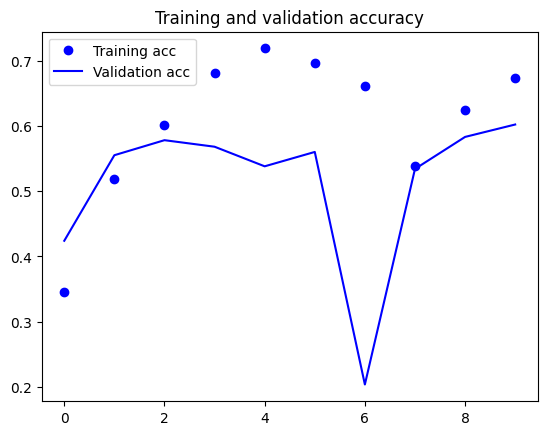

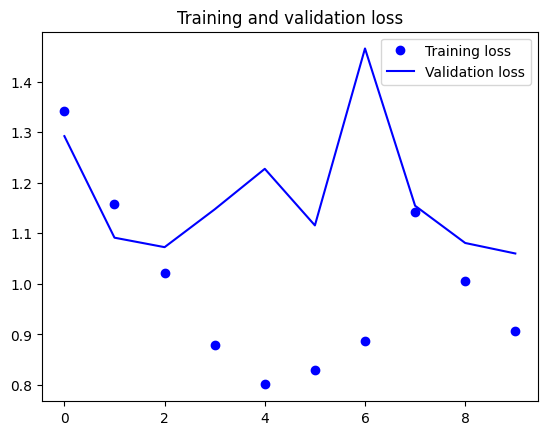

In [27]:
acc = historyRNN.history['accuracy']
val_acc = historyRNN.history['val_accuracy']
loss = historyRNN.history['loss']
val_loss = historyRNN.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# RNN (Bidirectional)

In [29]:
model_bi = tf.keras.models.Sequential([    
    tf.keras.layers.Embedding(vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [30]:
model_bi.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

history_bi = model_bi.fit(training_padded, y_train, epochs=5, batch_size=256,
                    validation_data=(validation_padded, y_val), 
                    )

Epoch 1/5
292/292 [==============================] - 208s 699ms/step - loss: 0.9047 - accuracy: 0.6233 - val_loss: 0.5914 - val_accuracy: 0.7860
Epoch 2/5
292/292 [==============================] - 191s 655ms/step - loss: 0.2987 - accuracy: 0.8885 - val_loss: 0.5552 - val_accuracy: 0.8060
Epoch 3/5
292/292 [==============================] - 189s 648ms/step - loss: 0.1675 - accuracy: 0.9354 - val_loss: 0.6390 - val_accuracy: 0.8070
Epoch 4/5
292/292 [==============================] - 187s 642ms/step - loss: 0.1231 - accuracy: 0.9509 - val_loss: 0.8774 - val_accuracy: 0.7910
Epoch 5/5
292/292 [==============================] - 186s 637ms/step - loss: 0.1007 - accuracy: 0.9571 - val_loss: 1.0412 - val_accuracy: 0.7860


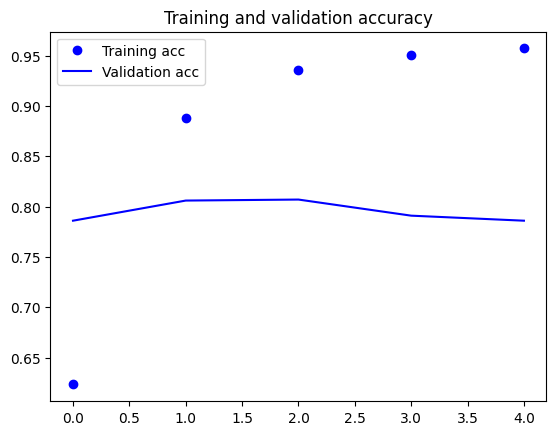

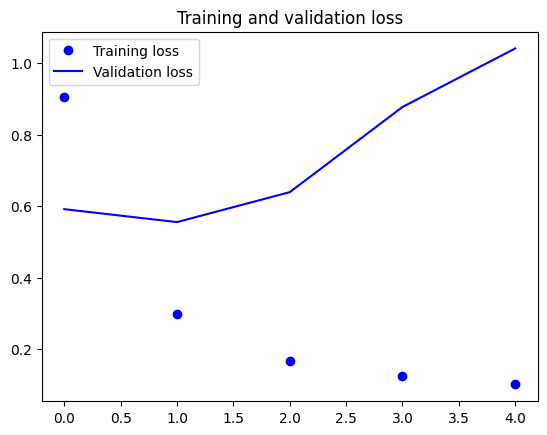

In [33]:
acc = history_bi.history['accuracy']
val_acc = history_bi.history['val_accuracy']
loss = history_bi.history['loss']
val_loss = history_bi.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# LSTM model

In [39]:
model_lstm = tf.keras.models.Sequential([    
    tf.keras.layers.Embedding(vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [40]:
model_lstm.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 64)          2612352   
                                                                 
 bidirectional_3 (Bidirectio  (None, 128)              66048     
 nal)                                                            
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dense_15 (Dense)            (None, 4)                 260       
                                                                 
Total params: 2,686,916
Trainable params: 2,686,916
Non-trainable params: 0
_________________________________________________________________


In [28]:
# model_lstm.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
#               optimizer=tf.keras.optimizers.Adam(),
#               metrics=['accuracy'])

# history_lstm = model_lstm.fit(training_padded, y_train, epochs=5, batch_size=128,
#                     validation_data=(validation_padded, y_val), 
#                    )

In [ ]:
# lstm_loss, lstm_acc = model_lstm.evaluate(testing_padded, y_test)

# print('Test Loss: {}'.format(lstm_loss))
# print('Test Accuracy: {}'.format(lstm_acc))

In [ ]:
# acc = history_lstm.history['accuracy']
# val_acc = history_lstm.history['val_accuracy']
# loss = history_lstm.history['loss']
# val_loss = history_lstm.history['val_loss']

# epochs = range(len(acc))

# plt.plot(epochs, acc, 'bo', label='Training acc')
# plt.plot(epochs, val_acc, 'b', label='Validation acc')
# plt.title('Training and validation accuracy')
# plt.legend()

# plt.figure()

# plt.plot(epochs, loss, 'bo', label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
# plt.title('Training and validation loss')
# plt.legend()

# plt.show()


# MultinomialNB

In [41]:
import pandas as pd
import numpy as np
import re
import string


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB

In [42]:
X_train = train_df['review']
y_train = train_df['label']

In [43]:
X_val = val_df['review']
y_val = val_df['label']

In [44]:
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_val = vectorizer.transform(X_val)

In [45]:
model = MultinomialNB()
model.fit(X_train,y_train)
model.score(X_train,y_train)

0.8036072949305053

In [46]:
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val,y_pred)
print(accuracy)

0.812


In [47]:
from nltk.sentiment.util import mark_negation
from tqdm.notebook import tqdm
tqdm.pandas()
import spacy
nlp = spacy.load("en_core_web_sm")
def text_processing_negate(text):
    text = text.lower()
    doc = nlp(text)
    tokens = mark_negation([token.text for token in doc], double_neg_flip=False)

    filtered_tokens = [token for token in nlp(' '.join(tokens)) if not token.is_stop and not token.is_punct]
    lemmas = [token.lemma_ for token in filtered_tokens]
    return ' '.join(lemmas)

In [48]:
train_df['content_processed_negation_flag'] = train_df['review'].progress_apply(text_processing_negate)
val_df['content_processed_negation_flag'] = val_df['review'].progress_apply(text_processing_negate)

  0%|          | 0/74682 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

In [49]:
X_train= train_df['content_processed_negation_flag']
X_test= val_df['content_processed_negation_flag']
y_train = train_df['label']
y_test = val_df['label']

In [50]:
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [51]:
model_negate_flag = MultinomialNB()
model_negate_flag.fit(X_train,y_train)
model_negate_flag.score(X_train,y_train)

0.7902841380787874

In [52]:
y_pred = model_negate_flag.predict(X_test)
acc = accuracy_score(y_pred,y_test)
print(acc)

0.78
